In [1]:
from pytrends.request import TrendReq
from matplotlib import pyplot as plt
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Vizu settings
%matplotlib inline
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10, 6)

# Local imports
from utils import load_countries, plot_history, histories_to_pandas
from search_engine import SearchEngine

# reproducibility
import random
random.seed(1337)

In [2]:
COUNTRY_DIR = "docs/countries.txt"
COUNTRY_IGNORE_DIR = "docs/ignore.txt"
LANGUAGE = 'en-US'
TIME_ZONE = 360

search_engine = SearchEngine(
    pytrends = TrendReq(hl=LANGUAGE, tz=TIME_ZONE),
    supported_countries = load_countries(filename=COUNTRY_DIR, ignore=COUNTRY_IGNORE_DIR),
    fetch_interval = 1
)

### Example query: 1

```python
YEAR = 2019
SEARCH_TERMS = ["ski"]
SEARCH_COUNTRIES = ["Norway", "Sweden", "Denmark"]
```

### Example query: 2

```python
YEAR = 2019
SEARCH_TERMS = ["ski"]
SEARCH_COUNTRIES = 3 
# 0: int .. returns all available countries
# 3: int .. returns 3 random countries 
# X: int .. returns X random countries 
```

### Example query: 3

```python
YEAR = 2019
SEARCH_TERMS = ["cheese", "wine"]
SEARCH_COUNTRIES = ["Italy", "France", "Spain"]
```

In [3]:
YEAR = 2010
SEARCH_TERMS = ["ski"]
SEARCH_COUNTRIES = ["Norway"]

### Query the Google API via our Search Engine

In [4]:
history_trends = search_engine.get_daily_trends_by_year(
    search_terms=SEARCH_TERMS,
    year=YEAR,
    countries=SEARCH_COUNTRIES
)

Fetching trends: 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]


#### Display trends

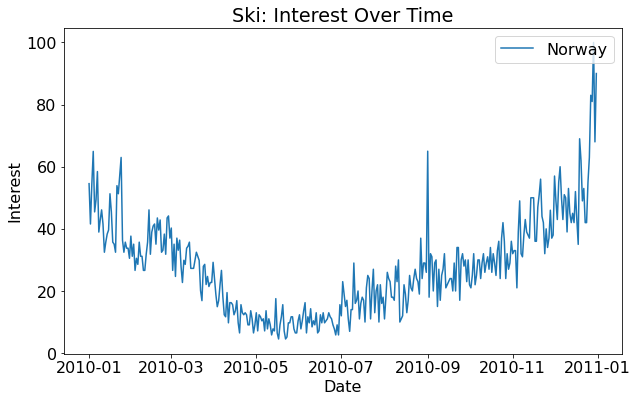

In [5]:
plot_history(history_trends, SEARCH_TERMS)

## Merge Trends to DataFrame

In [6]:
YEARS = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

total_trends = []


for year in YEARS:

    history_trends = search_engine.get_daily_trends_by_year(
        search_terms=SEARCH_TERMS,
        year=year,
        countries=SEARCH_COUNTRIES
    )

    trends_df = histories_to_pandas(history_trends)

    total_trends.append(trends_df)

ski_trends = pd.concat(total_trends)


Fetching trends: 100%|██████████| 1/1 [00:03<00:00,  3.60s/it]


In [7]:
ski_trends.head()

,date,ski,country
0,2010-01-01,54.545455,Norway
1,2010-01-02,41.558442,Norway
2,2010-01-03,54.545455,Norway
3,2010-01-04,64.935065,Norway
4,2010-01-05,45.454545,Norway


In [8]:
ski_trends.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 0 to 365
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     4018 non-null   datetime64[ns]
 1   ski      4018 non-null   float64       
 2   country  4018 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 125.6+ KB


AttributeError: 'Line2D' object has no property 'labeol'

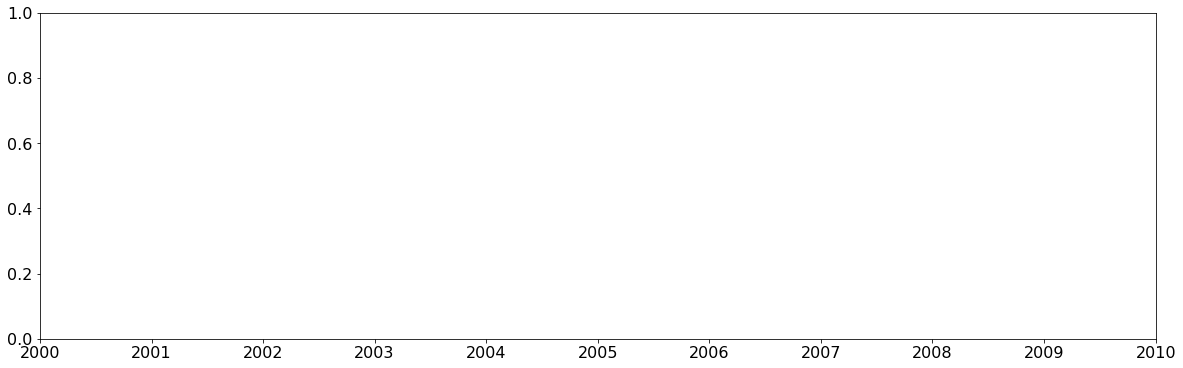

In [11]:
plt.figure(figsize=(20, 6))
plt.plot(ski_trends["date"], ski_trends["ski"], label='ski')
plt.title("Skiing trends")
plt.legend()

### TODO

- Check if all data is valid, and doesn't contain NaN values (?)
- Save DataFrame to DataBase (?)
  - what column_names to follow?
  - allow blank spaces?
  - etc etc..

### Optionally: save to CSV

In [10]:
ski_trends.to_csv(f"trends-{YEAR}.csv", index=False)